In [1]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Pylint parameters
%config Completer.use_jedi = False

# Measure Runtime
# !pip install ipython-autotime
%load_ext autotime

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

time: 545 µs (started: 2021-04-26 12:10:54 +02:00)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

time: 1.31 s (started: 2021-04-26 12:10:55 +02:00)


In [3]:
!pwd

/home/anneconstance/code/migasar/kaggle-wagon552-shopee/notebooks
time: 132 ms (started: 2021-04-26 12:10:57 +02:00)


In [6]:
train_df = pd.read_csv('../raw_data/train.csv') 
test_df = pd.read_csv('../raw_data/test.csv')
ss_df = pd.read_csv('../raw_data/sample_submission.csv', index_col = 0)

time: 147 ms (started: 2021-04-26 12:11:21 +02:00)


In [7]:
train_df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


time: 20.6 ms (started: 2021-04-26 12:11:23 +02:00)


In [55]:
test_df.head()

,posting_id,image,image_phash,title,label_group
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...,249114794
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...,2937985045
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng,2395904891


time: 19.2 ms (started: 2021-04-26 15:08:04 +02:00)


In [8]:
train_data = train_data.copy()
test_data = test_data.copy()
ss_data = train_data.copy()

time: 7.93 ms (started: 2021-04-26 12:11:41 +02:00)


In [9]:
train_df.size

171250

time: 3.86 ms (started: 2021-04-26 12:11:46 +02:00)


In [11]:
train_df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


time: 18.7 ms (started: 2021-04-25 14:42:55 +02:00)


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB
time: 30.7 ms (started: 2021-04-25 14:42:58 +02:00)


In [13]:
train_df.describe()

,label_group
count,3.425000e+04
mean,2.128611e+09
std,1.234630e+09
min,2.580470e+05
25%,1.050720e+09
50%,2.120410e+09
75%,3.187910e+09
max,4.294197e+09


time: 21.2 ms (started: 2021-04-25 14:43:01 +02:00)


In [10]:
train_df['image'].shape

(34250,)

time: 3.6 ms (started: 2021-04-26 12:11:51 +02:00)


In [15]:
train_df.nunique()

posting_id     34250
image          32412
image_phash    28735
title          33117
label_group    11014
dtype: int64

time: 71.2 ms (started: 2021-04-25 14:43:09 +02:00)


In [16]:
train_df.isna().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

time: 23.4 ms (started: 2021-04-25 14:43:13 +02:00)


In [19]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [11]:
from skimage import io
import os

time: 99.1 ms (started: 2021-04-26 12:12:08 +02:00)


In [6]:
def trans_img(file_name):
    filename = os.path.abspath(os.path.join('../raw_data/train_images', file_name))
    return io.imread(filename)

time: 968 µs (started: 2021-04-25 19:23:13 +02:00)


In [7]:
img_1 = trans_img('00039780dfc94d01db8676fe789ecd05.jpg')

time: 49.9 ms (started: 2021-04-25 19:23:15 +02:00)


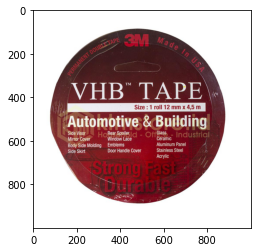

time: 323 ms (started: 2021-04-25 19:23:16 +02:00)


In [8]:
plt.imshow(img_1)

In [38]:
test_df['label_group'] = train_df['label_group']
test_df['label_group'] = test_df['label_group'].values.astype(str)
test_df['label_group'][0].dtypes

AttributeError: 'str' object has no attribute 'dtypes'

time: 17.1 ms (started: 2021-04-26 12:26:55 +02:00)


# Image preprocessing

## Resizing

We want to reshape the images in smaller size (state-of-the-art networks are trained on (224,224,3) images / tensors)

In [58]:
from skimage import io
import os

def get_img_size():
    images = [image for image in train_df['image']]
    img_shape = []
    for image in images[11:76]:
        img = trans_img(image)
        x = img.shape
        img_shape.append(x)
        size_img = pd.DataFrame(img_shape)
    return size_img

time: 11.1 ms (started: 2021-04-25 17:06:46 +02:00)


In [59]:
img_size_df = get_img_size()
img_size_df.sort_values(by=0, ascending=False)

,0,1,2
9,4501,4500,3
56,1024,1024,3
16,1024,1024,3
15,1024,1024,3
28,1024,1024,3
...,...,...,...
64,640,640,3
11,604,604,3
8,595,595,3
2,449,449,3


time: 1.5 s (started: 2021-04-25 17:06:53 +02:00)


In [61]:
max(img_size_df[1]), min(img_size_df[1])

(4500, 314)

time: 4.32 ms (started: 2021-04-25 17:07:00 +02:00)


In [65]:
sizes_set = set(img_size_df[0])
def sizes_ratio():
    for size in sizes_set:
        return img_size_df[0].value_counts()/len(train_df['image'])*100

time: 1.04 ms (started: 2021-04-25 17:07:45 +02:00)


In [66]:
len(sizes_set)

18

time: 3.33 ms (started: 2021-04-25 17:07:47 +02:00)


In [67]:
x = sizes_ratio()
x.sort_values(ascending=False)


640     0.055474
1024    0.043796
700     0.020438
800     0.017518
1000    0.014599
960     0.002920
4501    0.002920
604     0.002920
595     0.002920
720     0.002920
449     0.002920
699     0.002920
650     0.002920
314     0.002920
820     0.002920
669     0.002920
665     0.002920
748     0.002920
Name: 0, dtype: float64

time: 14.1 ms (started: 2021-04-25 17:07:49 +02:00)


In [68]:
def get_unsquarred_ratio() :
    records = img_size_df.to_records(index=False)
    list_sizes = list(records)
    print(list_sizes)
    unsquarred =[]
    for x in list_sizes:
        if x[0]!=x[1]:
            unsquarred.append(x[0])
    return f"Ratio of unsquarred images : {round(len(unsquarred)/len(train_df['image']), 3)*100} %"

time: 1.2 ms (started: 2021-04-25 17:08:04 +02:00)


In [69]:
get_unsquarred_ratio()

[(1000, 1000, 3), (1000, 1000, 3), (449, 449, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (800, 800, 3), (314, 314, 3), (595, 595, 3), (4501, 4500, 3), (700, 700, 3), (604, 604, 3), (665, 665, 3), (700, 700, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (700, 700, 3), (700, 700, 3), (640, 640, 3), (640, 640, 3), (800, 800, 3), (640, 640, 3), (640, 640, 3), (640, 640, 3), (1000, 1000, 3), (1000, 1000, 3), (720, 720, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (700, 700, 3), (699, 699, 3), (800, 800, 3), (640, 640, 3), (700, 700, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (800, 800, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (700, 700, 3), (820, 820, 3), (640, 640, 3), (960, 960, 3), (640, 640, 3), (748, 748, 3), (800, 800, 3), (1024, 1024, 3), (1000, 1000, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (800, 800, 3), (669, 669, 3), (650, 650, 3

'Ratio of unsquarred images : 0.0 %'

time: 20.1 ms (started: 2021-04-25 17:08:09 +02:00)


Turning images into arrays of size (224, 224, 3) 

In [13]:
import PIL
import PIL.Image
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

time: 1.03 ms (started: 2021-04-26 12:12:46 +02:00)


In [24]:
df_test = train_df.copy()
df_test['label_group'] = df_test['label_group'].astype("|S")
df_test.label_group.dtypes

dtype('S21')

time: 49.4 ms (started: 2021-04-26 12:21:19 +02:00)


In [53]:
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.layers import Conv2D

df_test = pd.read_csv('../raw_data/train.csv')

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(dataframe=train_df, directory="raw_data", x_col="posting_id", y_col="image_phash", class_mode="categorical", target_size=(100,100), batch_size=32)

# Minimal Network + Common tricks + First hyperparameters tests


model = Sequential()

# First convolution & max-pooling
model.add(layers.Conv2D(16, (4,4), strides=(2,2), input_shape=(100, 100, 3), padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3)))

# Second convolution & max-pooling
model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
# model.add(Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))

# model.add(Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

# model.add(Dropout(0.25))


# model.compile,
# loss="categorical_crossentropy", metrics=["accuracy"])
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# model.fit_generator(generator=train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=10)

model.summary()


Found 0 validated image filenames belonging to 0 classes.
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 50, 50, 16)        784       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               51300     
______________________________________________________________

In [57]:
from tensorflow.keras.utils import to_categorical

X_train = train_df.drop(columns='image_phash')
X_test = test_df.drop(columns='image_phash')
y_train = train_df.image_phash
y_test = test_df.image_phash

X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

AttributeError: 'DataFrame' object has no attribute 'reshape'

time: 44.3 ms (started: 2021-04-26 15:10:03 +02:00)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# rmsprop (lr=0.0001)

In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
model.fit(x_train, y_cat_train, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

In [96]:
# import pathlib
# filename = os.path.abspath(os.path.join('../raw_data/train_images'))
# data_dir = tf.keras.utils.get_file(origin=filename, 
#                                    fname='image', 
#                                    untar=True)
# data_dir = pathlib.Path(data_dir)

ValueError: unknown url type: '/home/anneconstance/code/migasar/kaggle-wagon552-shopee/raw_data/train_images'

time: 30.2 ms (started: 2021-04-26 11:47:48 +02:00)


In [91]:
# train_df = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 0 files belonging to 1 classes.
Using 0 files for training.


TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.

time: 1.1 s (started: 2021-04-26 11:31:12 +02:00)


NameError: name 'df_train' is not defined

time: 18.8 ms (started: 2021-04-26 12:09:38 +02:00)


TypeError: If class_mode="categorical", y_col="label_group" column values must be type string, list or tuple.

time: 197 ms (started: 2021-04-26 12:06:32 +02:00)


In [62]:


def drop_unsquarred():
    df_squarred = []
    images = [image for image in train_df['image']]
    for image in images[0:10]:
        image_size=Image.open(f"../raw_data/train_images/{age}").size
        if image_size[0] == image_size[1]:
            df_squarred.append(image)
    df_squarred = pd.DataFrame(df_squarred)
    return df_squarred

time: 1.12 ms (started: 2021-04-26 09:34:04 +02:00)


In [81]:
df_squarred = drop_unsquarred()
for image in df_squarred.loc:
    print(type(image))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


KeyError: 10

time: 48.5 ms (started: 2021-04-26 09:42:23 +02:00)


In [70]:
def resize_save_unsquarred():
    img_squarred = []
    for image in df_squarred:
        print(type(df_squarred))
        print(type(image))
#         image_open=Image.open(f"../raw_data/train_images/{image}").resize((224,224))
#         image_open.save(f"../raw_data/train_images/resized/{image}")
#         img_squarred.append(image_open)
#     return img_squarred

time: 1.19 ms (started: 2021-04-26 09:37:25 +02:00)


In [71]:
img_squarred = resize_save_unsquarred()

<class 'pandas.core.frame.DataFrame'>
<class 'int'>
time: 1.28 ms (started: 2021-04-26 09:37:26 +02:00)


In [11]:
plt.imshow(img_squarred[1100])

NameError: name 'img_squarred' is not defined

time: 204 ms (started: 2021-04-26 09:01:16 +02:00)


In [ ]:
train_df['resized_image'] = pd.read_csv('../raw_data/train_images/resized/train.csv') 

In [100]:
from skimage.transform import resize
from skimage import io
import os

def resize_images():
    images = [image for image in train_df['image']]
    img_shape = []
    for image in images[0:10]:
        image_path =  f'{image}'
        filename = os.path.abspath(os.path.join('../raw_data/train_images', image_path))
        img = io.imread(filename)
        x = img.shape
        img_shape.append(x)
        size_img = pd.DataFrame(img_shape)
        for img in size_img.loc[:,[0, 1]]:
            image_resized = resize(img, (img[0] // 5000 * 100, img[1] // 5000 * 100), anti_aliasing=True)
    return train_df['image']

time: 183 ms (started: 2021-04-25 17:30:27 +02:00)


In [101]:
resize_images()

TypeError: 'int' object is not subscriptable

time: 52.6 ms (started: 2021-04-25 17:30:29 +02:00)


## Intensity normalization

Neural networks converge faster if the inputs are somewhat normalized. Therefore we want to transform the image pixels with values between 0 and 255 (for each color) into values between -1 and 1, thanks to Keras libraries (or just by dividing all the data by 255)

## Data augmentation

Creation of additionnal data to explore : 
- Mirror
- Crop
- rotations
- slight transformation of the colors
- change of the textures
- "photoshop effects": blur, halo, ...
- deformations
- ...

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = Sequential()
model.add(Reshape((5*5*1,), input_shape=(5,5,1)))  # This flattens the (5, 5, 1) image to a vector of size 25
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Preprocessing on titles 

In [89]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


- Lowercase
- remove numbers
- remove punctuation
- remove stop words
- select important words with stemmer

In [18]:
#labels
print(f"label_group unique values: {train_df['label_group'].nunique()}")

label_group unique values: 11014
time: 3.32 ms (started: 2021-04-25 14:44:09 +02:00)


In [21]:
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]
print("Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))

Max no. of apparitions in 1 group: 51 
Min no. of apparitions in 1 group: 2
time: 5.75 ms (started: 2021-04-25 14:52:07 +02:00)


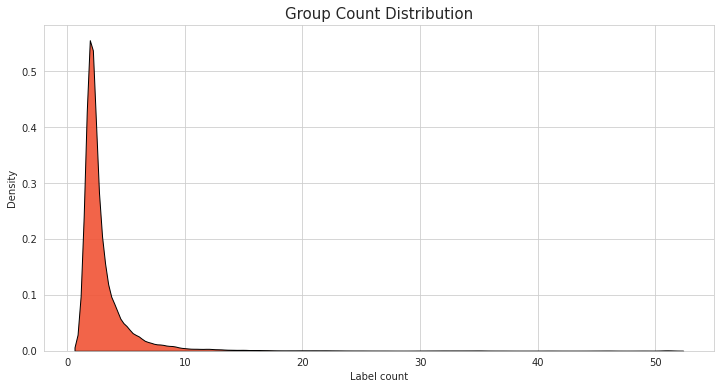

time: 454 ms (started: 2021-04-25 14:52:49 +02:00)


In [22]:
# Plot labels distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Group Count Distribution', fontsize = '15')
sns.kdeplot(groups_df['count'], fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Label count')
plt.show();

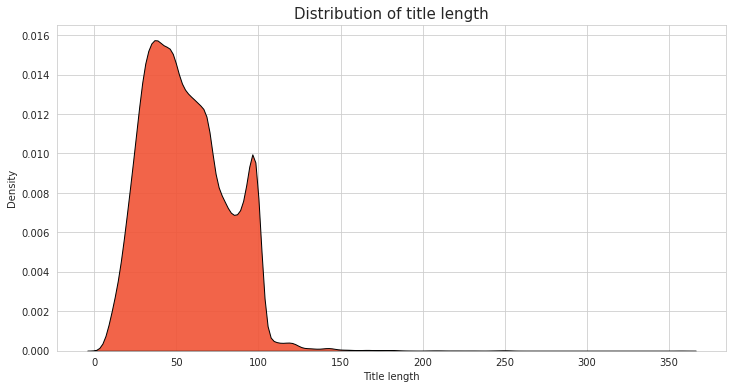

time: 524 ms (started: 2021-04-25 14:53:44 +02:00)


In [23]:
# Plot titles length distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Distribution of title length', fontsize = '15')
sns.kdeplot(train_df['title'].apply(lambda x: len(x)), fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Title length')
plt.show();

In [40]:
!pip install -U textblob
!python -m textblob.download_corpora

You should consider upgrading via the '/home/anneconstance/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.
[nltk_data] Downloading package brown to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/anneconstance/nltk_data...
[nltk_data]   Unzipp

In [46]:
import string 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

unpreproc_title = train_df["title"][1]
print(f"Before: {unpreproc_title}")
lower_title = unpreproc_title.lower()
print(f"Lower case: {lower_title}")
punct = "!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]:"
rem_punct = lower_title.translate(str.maketrans('','',string.punctuation))
print(f"Remove punctuation: {rem_punct}")
rem_whitespaces = rem_punct.strip()
print(f"Remove whitespaces: {rem_whitespaces}")
tokenize = word_tokenize(rem_whitespaces)
print(f"Tokenized: {tokenize}")
rem_stop_words = [word for word in tokenize if not word in stopwords.words()]
print(f"Remove stopwords: {rem_stop_words}")
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in rem_stop_words]
print(f"Lemmatization: {lemmatized_text}")
pos_text = TextBlob(' '.join(lemmatized_text))
print(f"Part_Of_Speech: {pos_text.tags}")


Before: Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE
Lower case: double tape 3m vhb 12 mm x 4,5 m original / double foam tape
Remove punctuation: double tape 3m vhb 12 mm x 45 m original  double foam tape
Remove whitespaces: double tape 3m vhb 12 mm x 45 m original  double foam tape
Tokenized: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'm', 'original', 'double', 'foam', 'tape']
Remove stopwords: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'original', 'double', 'foam', 'tape']
Lemmatization: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'original', 'double', 'foam', 'tape']
Part_Of_Speech: [('double', 'JJ'), ('tape', 'NN'), ('3m', 'CD'), ('vhb', 'NN'), ('12', 'CD'), ('mm', 'NN'), ('x', 'VBD'), ('45', 'CD'), ('original', 'JJ'), ('double', 'JJ'), ('foam', 'NN'), ('tape', 'NN')]
time: 81 ms (started: 2021-04-25 15:24:19 +02:00)


In [48]:
def preproc_title(title):
    title = title.lower()
    title = title.translate(str.maketrans('','',string.punctuation))
    title = title.strip()
    tokens_title = word_tokenize(title)
    tokens_title = [word for word in tokens_title if not word in stopwords.words()]
    lemmatizer = WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in tokens_title]
    preproc_title = ' '.join(lemm_text)
    return preproc_title

def get_part_of_speech(prepped_title):
    part_of_speech = TextBlob(prepped_title)
    part_of_speech = ' '.join([j for (i, j) in pos_text.tags])
    return part_of_speech

time: 1.2 ms (started: 2021-04-25 15:25:13 +02:00)


In [49]:
train_df["preproc_title"] = train_df["title"].apply(lambda x: preproc_title(x))

time: 23min 43s (started: 2021-04-25 15:25:14 +02:00)


In [50]:
train_df["part_of_speech"] = train_df["preproc_title"].apply(lambda x: get_part_of_speech(x))

time: 325 ms (started: 2021-04-25 15:49:00 +02:00)


In [ ]:
# Read in prepped data
# train_df_prep = pd.read_csv("../raw_data/shopee-preprocessed-data/train_title_prepped.csv")
# train_df_prep["label_group"] = train_df_prep["label_group"].astype(str)